<a href="https://colab.research.google.com/github/versusic/My-portfolio/blob/main/2_iris_dataset_classification_using_a_simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris classification

# 1. import libraries

In [248]:
import pandas as pd
import numpy as np

from sklearn import datasets
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import matplotlib.pyplot as plt

# 2. Install the dataset

In [249]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
iris_dataset = pd.read_csv(url)

In [250]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# 3. Data transformation and visualization

In [251]:
iris_dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [252]:
iris_dataset['species'] = iris_dataset['species'].map({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [253]:
iris_dataset['species'].unique()

array([0, 1, 2])

In [254]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


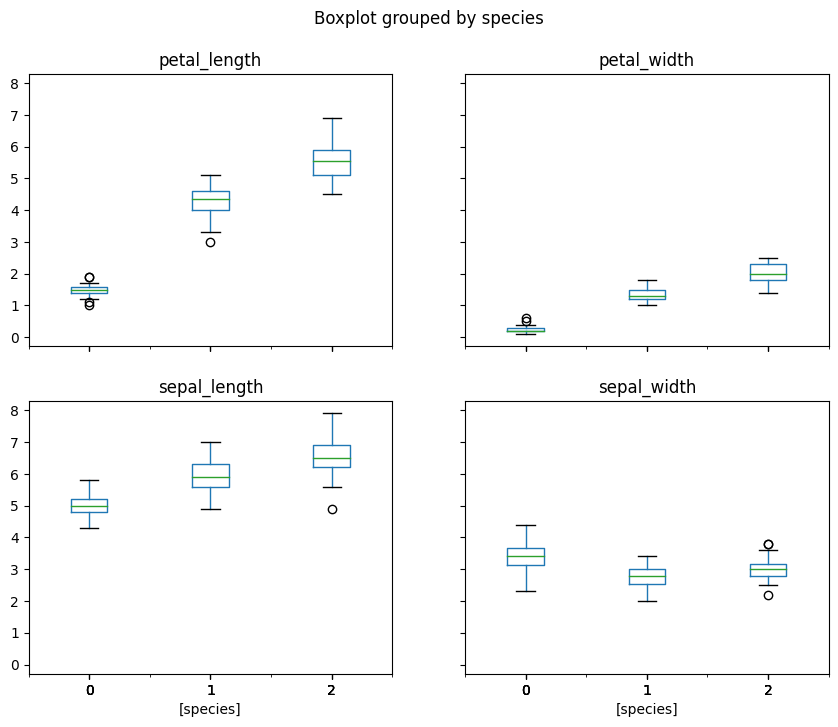

In [255]:
iris_dataset.boxplot(by='species', figsize=(10, 8), grid=False)
plt.show()

In [256]:
X = iris_dataset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = iris_dataset['species']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [258]:
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.LongTensor(y_train.values)
y_test = torch.LongTensor(y_test.values)

# 4. defining the model

In [259]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=200, h2=100, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x

In [260]:
model = Model()

In [261]:
print(model)

Model(
  (fc1): Linear(in_features=4, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=3, bias=True)
)


In [262]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# 5. Training model

In [263]:
epochs = 100
losses = []
val_losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = loss_fn(y_pred, y_train)

    losses.append(loss.detach().numpy())

    with torch.no_grad():
        y_val = model.forward(X_test)
        val_loss = loss_fn(y_val, y_test)
        val_losses.append(val_loss.detach().numpy())

    if i % 10 == 0:
      print(f'Epoch: {i} train loss: {loss.item():3f} val loss: {val_loss.item():3f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 train loss: 1.466489 val loss: 1.680121
Epoch: 10 train loss: 0.497614 val loss: 0.548835
Epoch: 20 train loss: 0.259868 val loss: 0.264853
Epoch: 30 train loss: 0.109907 val loss: 0.063347
Epoch: 40 train loss: 0.077201 val loss: 0.030067
Epoch: 50 train loss: 0.067819 val loss: 0.022727
Epoch: 60 train loss: 0.062469 val loss: 0.025970
Epoch: 70 train loss: 0.059641 val loss: 0.029421
Epoch: 80 train loss: 0.057907 val loss: 0.033275
Epoch: 90 train loss: 0.056367 val loss: 0.030319


# 6. Testing and Visualize results

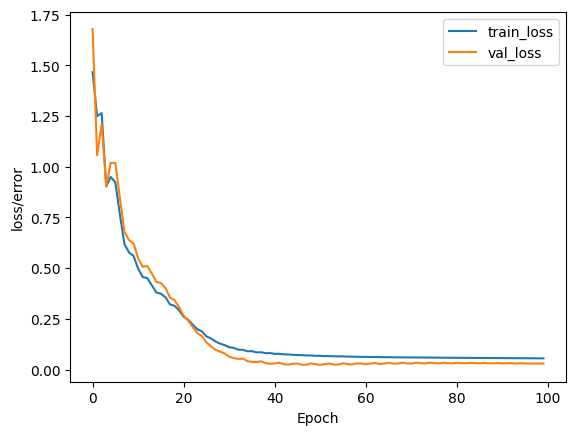

In [264]:
plt.plot(range(epochs), losses, label = 'train_loss')
plt.plot(range(epochs), val_losses, label = 'val_loss')
plt.ylabel("loss/error")
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [266]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print(f'{i+1}.) \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.) 	 2 	 2
2.) 	 2 	 2
3.) 	 1 	 1
4.) 	 1 	 1
5.) 	 1 	 1
6.) 	 0 	 0
7.) 	 0 	 0
8.) 	 0 	 0
9.) 	 2 	 2
10.) 	 2 	 2
11.) 	 1 	 1
12.) 	 0 	 0
13.) 	 0 	 0
14.) 	 1 	 1
15.) 	 2 	 2
16.) 	 2 	 2
17.) 	 1 	 1
18.) 	 1 	 1
19.) 	 2 	 2
20.) 	 0 	 0
21.) 	 1 	 1
22.) 	 2 	 2
23.) 	 2 	 2
24.) 	 1 	 1
25.) 	 1 	 1
26.) 	 2 	 2
27.) 	 2 	 1
28.) 	 1 	 1
29.) 	 1 	 1
30.) 	 0 	 0
We got 29 correct!
